**Import Libraries**

In [2]:
# Import necessary libraries for data handling and visualization
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
from xgboost import XGBClassifier # Import XGBClassifier if you're using XGBoost
from sklearn.model_selection import StratifiedKFold, cross_val_score # Import StratifiedKFold
from sklearn.metrics import f1_score # Import f1_score
from imblearn.over_sampling import SMOTE # Import SMOTE
from imblearn.under_sampling import RandomUnderSampler # Import RandomUnderSampler


# Set matplotlib to display plots inline (if using Jupyter)
%matplotlib inline

# Set a default style
sns.set(style="whitegrid")


**Loading the Dataset**

In [3]:

data = pd.read_csv("/content/drive/MyDrive/Fiverr work/ML Model/employee_promotion (1).csv")


# Quick data overview
print("Shape of the dataset:", data.shape)
print("First 5 rows:")
print(data.head())
print("Last 5 rows:")
print(data.tail())
print("Data info:")
data.info()
print("Statistical summary:")
print(data.describe().T)
print("Number of duplicate rows:", data.duplicated().sum())
print("Missing values per column:")
print(data.isnull().sum())



Shape of the dataset: (54808, 13)
First 5 rows:
   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8          

In [5]:
# Get counts of columns by data type
type_counts = data.dtypes.value_counts()
# Convert to a more readable DataFrame
df_type_counts = pd.DataFrame({
    "Data type": type_counts.index.astype(str),
    "No. of variables": type_counts.values
})

print("Table: Datatypes of the variables in the dataset\n")
print(df_type_counts)

Table: Datatypes of the variables in the dataset

  Data type  No. of variables
0     int64                 6
1    object                 5
2   float64                 2


** Identify categorical and numerical columns**

In [6]:

categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

print("\nCategorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)



Categorical columns:
['department', 'region', 'education', 'gender', 'recruitment_channel']

Numerical columns:
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']


**Target Variable Distribution**

<ipython-input-7-59bd6e2431de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_promoted", data=data, palette="viridis")


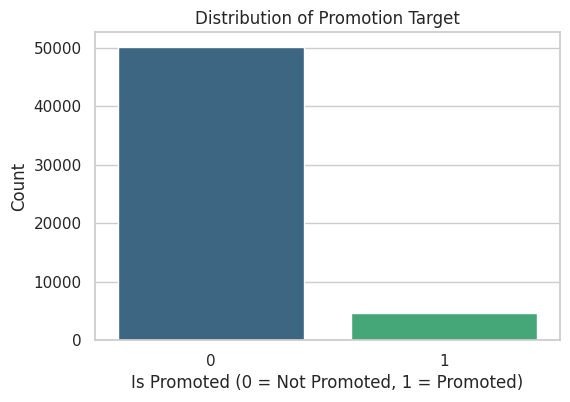

Promotion Count Distribution:
is_promoted
0    50140
1     4668
Name: count, dtype: int64


In [7]:
# Create a countplot for the target variable is_promoted
plt.figure(figsize=(6, 4))
sns.countplot(x="is_promoted", data=data, palette="viridis")
plt.title("Distribution of Promotion Target")
plt.xlabel("Is Promoted (0 = Not Promoted, 1 = Promoted)")
plt.ylabel("Count")
plt.show()

# Print the counts to view class distribution
promoted_counts = data['is_promoted'].value_counts()
print("Promotion Count Distribution:")
print(promoted_counts)

**Univariate Analysis – Numerical Features**

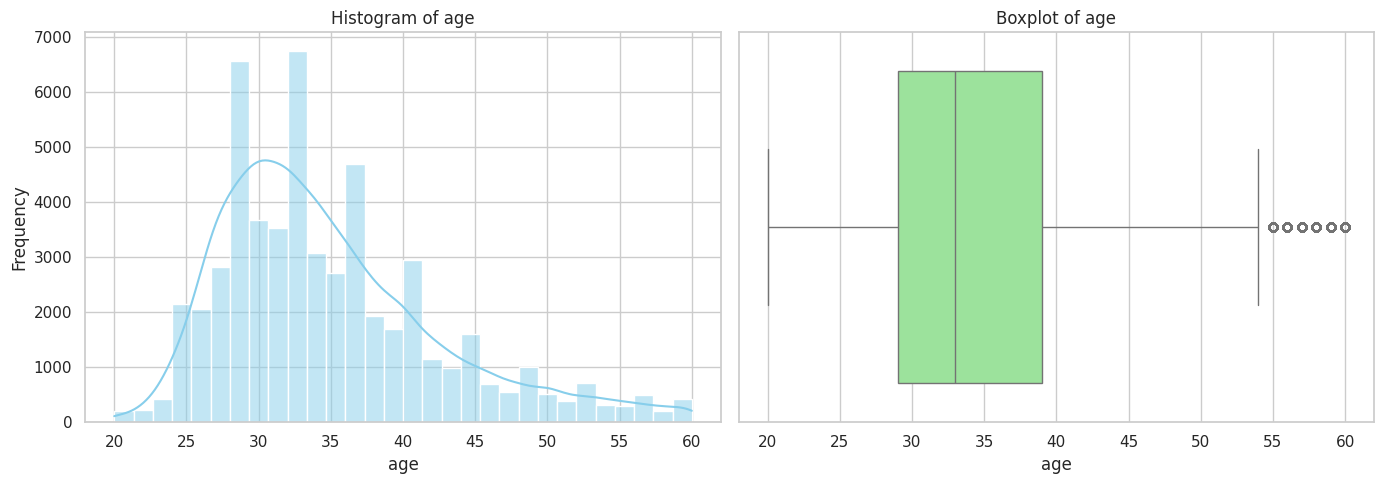

Summary statistics for age:
count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64
Skewness of age: 1.01



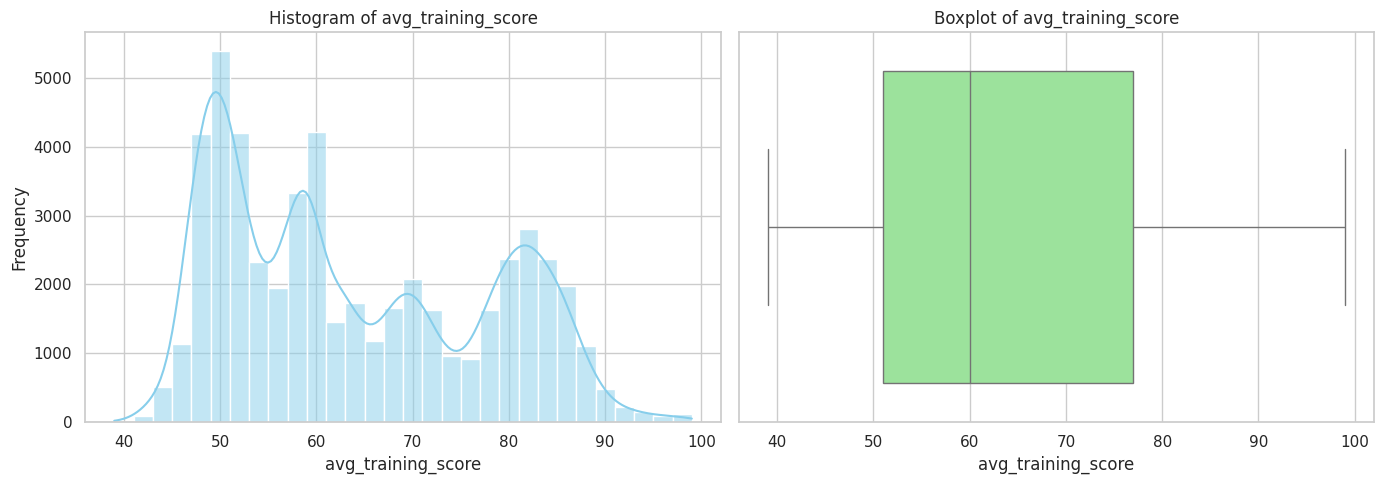

Summary statistics for avg_training_score:
count    52248.000000
mean        63.712238
std         13.521910
min         39.000000
25%         51.000000
50%         60.000000
75%         77.000000
max         99.000000
Name: avg_training_score, dtype: float64
Skewness of avg_training_score: 0.42



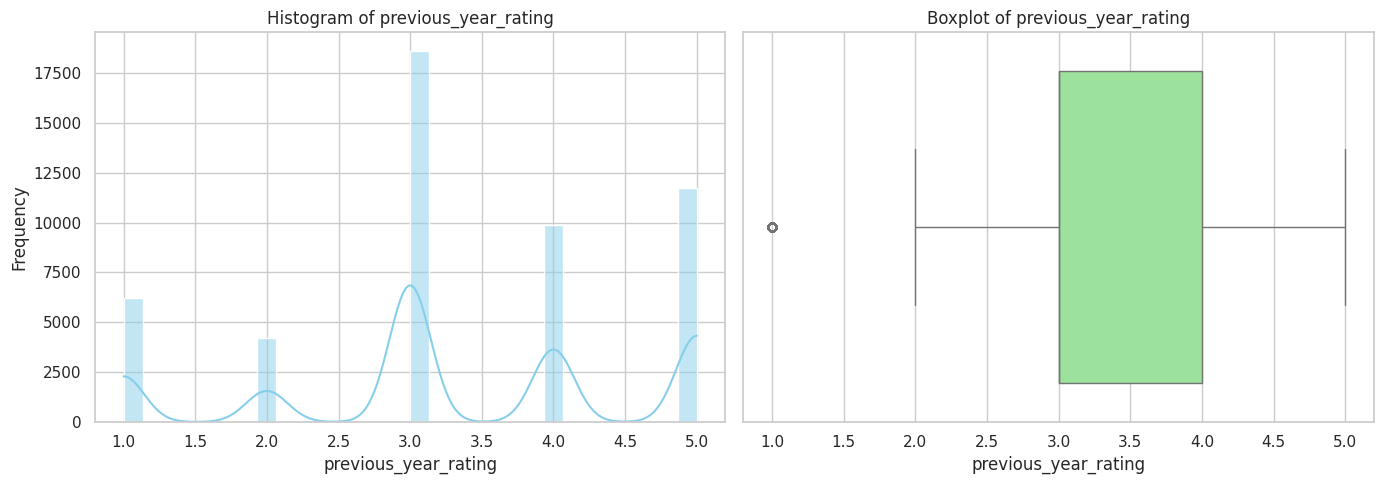

Summary statistics for previous_year_rating:
count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64
Skewness of previous_year_rating: -0.31



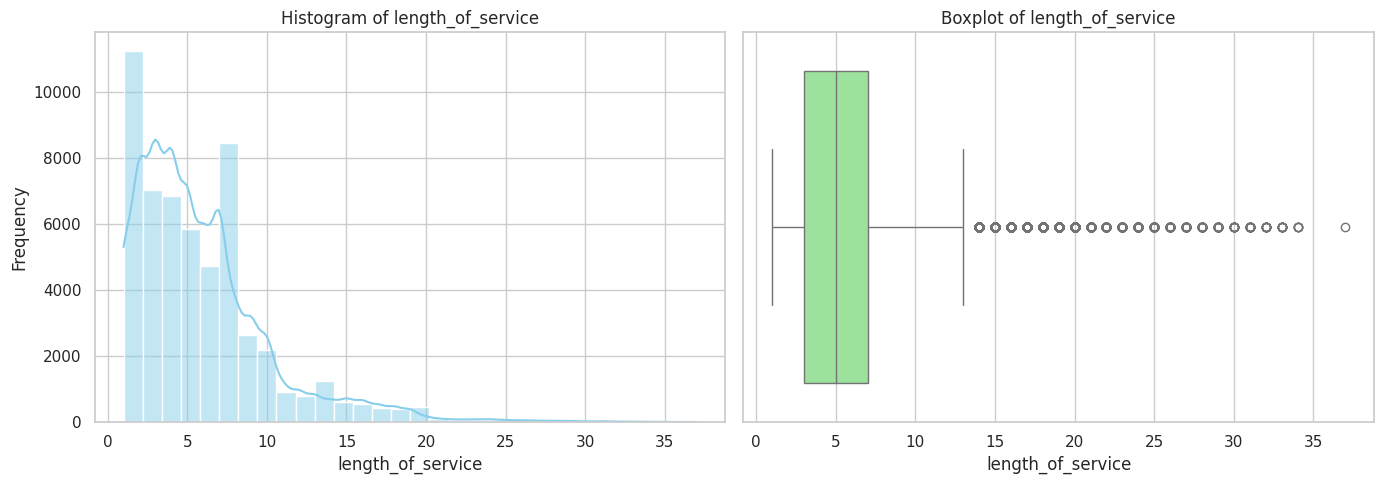

Summary statistics for length_of_service:
count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64
Skewness of length_of_service: 1.74



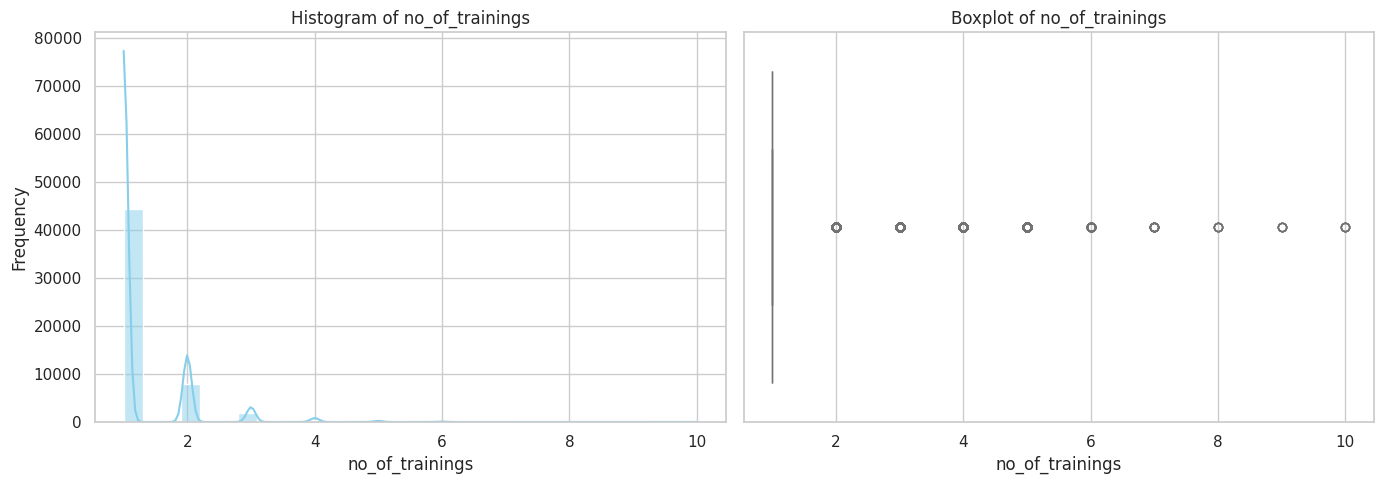

Summary statistics for no_of_trainings:
count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64
Skewness of no_of_trainings: 3.45



In [8]:
# List of numerical features to analyze
num_features = ['age', 'avg_training_score', 'previous_year_rating', 'length_of_service', 'no_of_trainings']

for feature in num_features:
    plt.figure(figsize=(14, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color="skyblue", bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # Boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature], color="lightgreen")
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

    # Print summary statistics and skewness
    print(f"Summary statistics for {feature}:")
    print(data[feature].describe())
    print(f"Skewness of {feature}: {data[feature].skew():.2f}\n")


**Univariate Analysis – Categorical Features**

<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


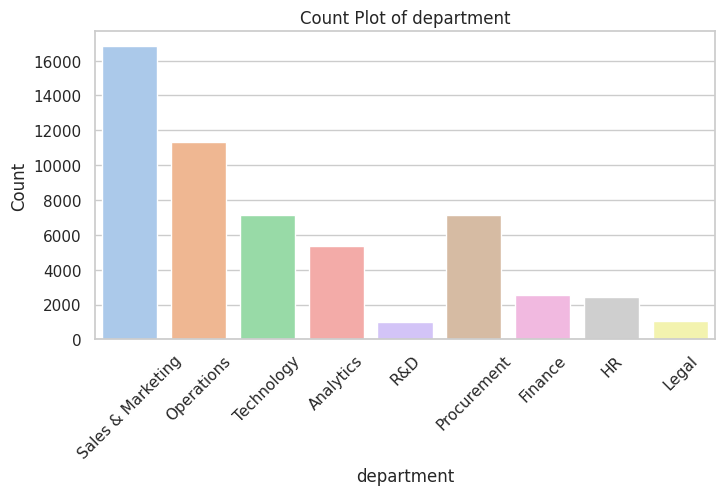

Value counts for department:
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64 



<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


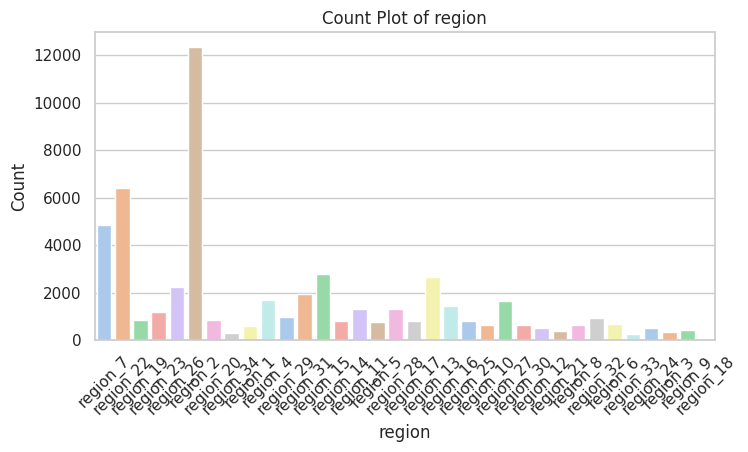

Value counts for region:
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64 



<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


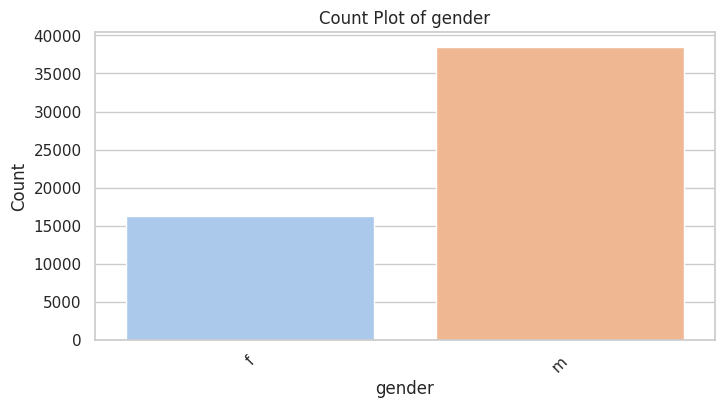

Value counts for gender:
gender
m    38496
f    16312
Name: count, dtype: int64 



<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


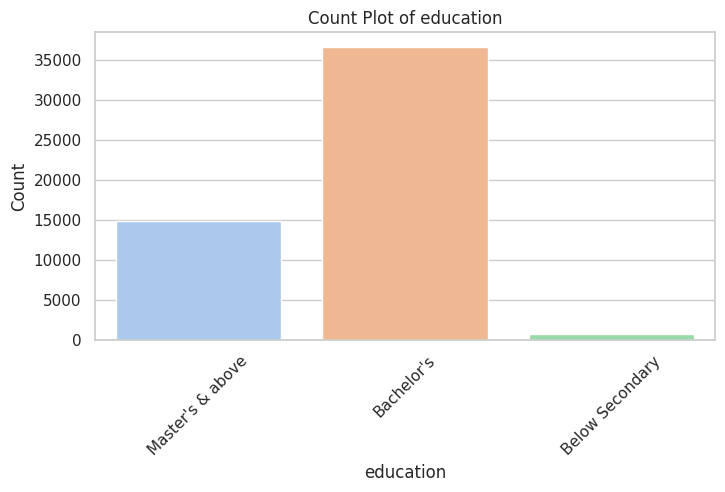

Value counts for education:
education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64 



<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


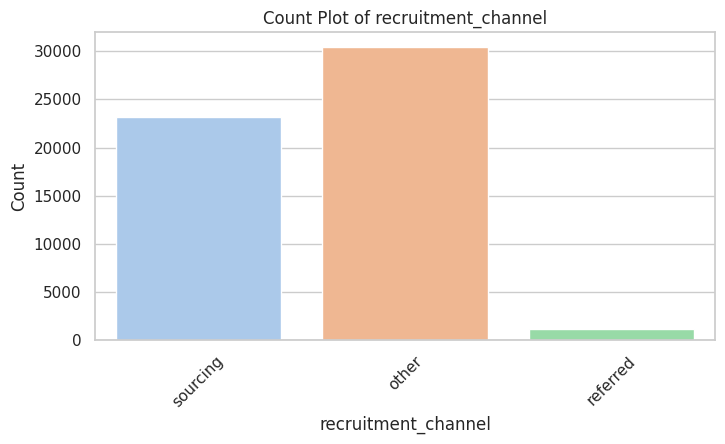

Value counts for recruitment_channel:
recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64 



<ipython-input-9-03c18dca67f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="pastel")


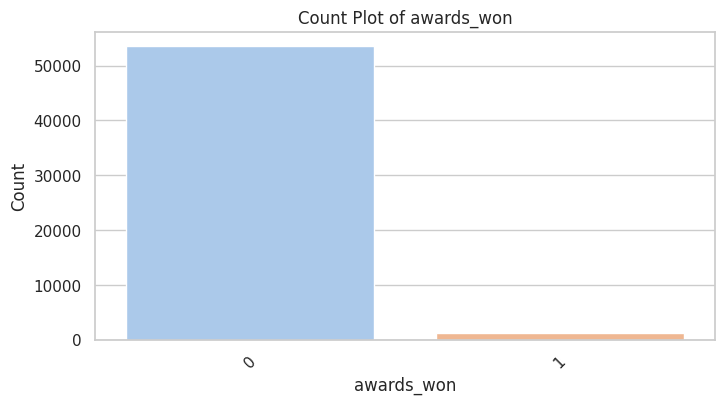

Value counts for awards_won:
awards_won
0    53538
1     1270
Name: count, dtype: int64 



In [9]:
# List of categorical features to analyze
cat_features = ['department', 'region', 'gender', 'education', 'recruitment_channel', 'awards_won']

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data, palette="pastel")
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Print value counts for the feature
    print(f"Value counts for {feature}:")
    print(data[feature].value_counts(), "\n")


** Bivariate Analysis – Numerical Features vs. Target**

<ipython-input-10-34f38e6b0d01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")


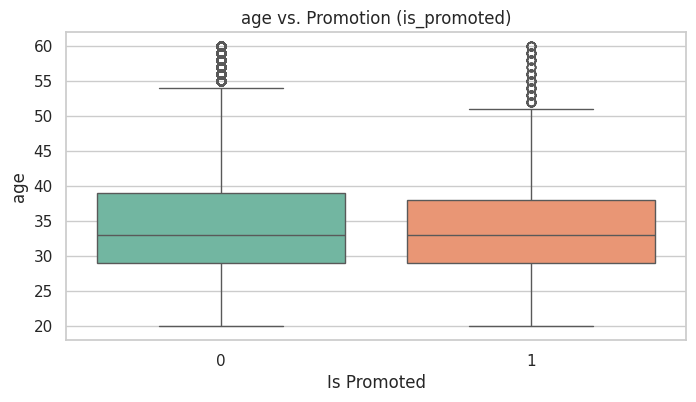

<ipython-input-10-34f38e6b0d01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")


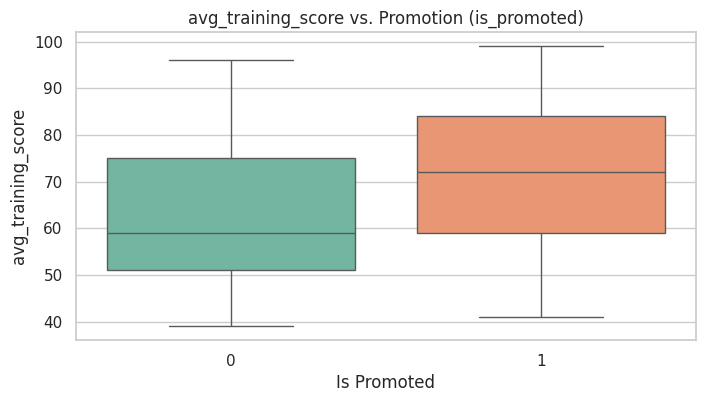

<ipython-input-10-34f38e6b0d01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")


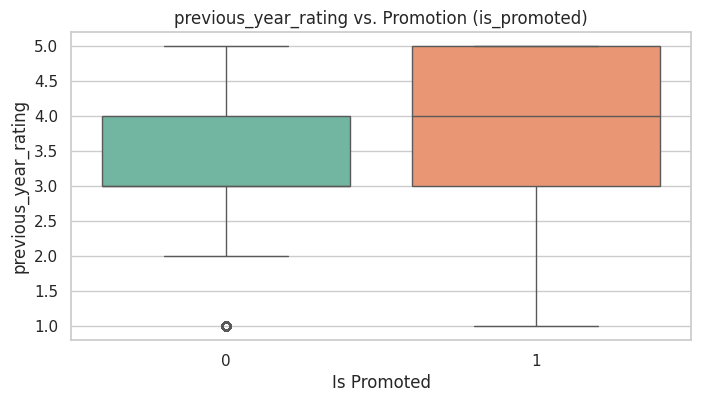

<ipython-input-10-34f38e6b0d01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")


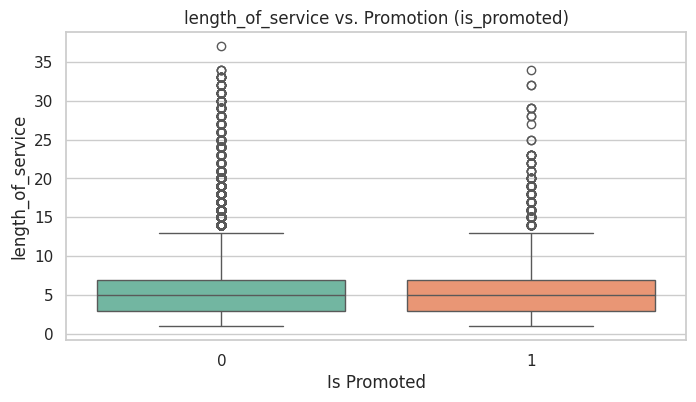

<ipython-input-10-34f38e6b0d01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")


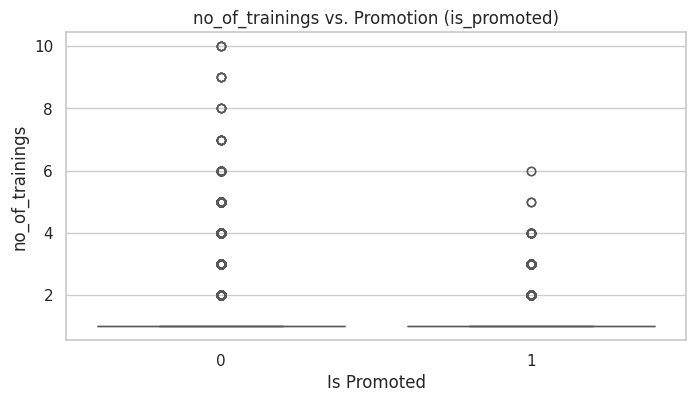

In [10]:
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="is_promoted", y=feature, data=data, palette="Set2")
    plt.title(f'{feature} vs. Promotion (is_promoted)')
    plt.xlabel("Is Promoted")
    plt.ylabel(feature)
    plt.show()


**Bivariate Analysis – Categorical Features vs. Target**

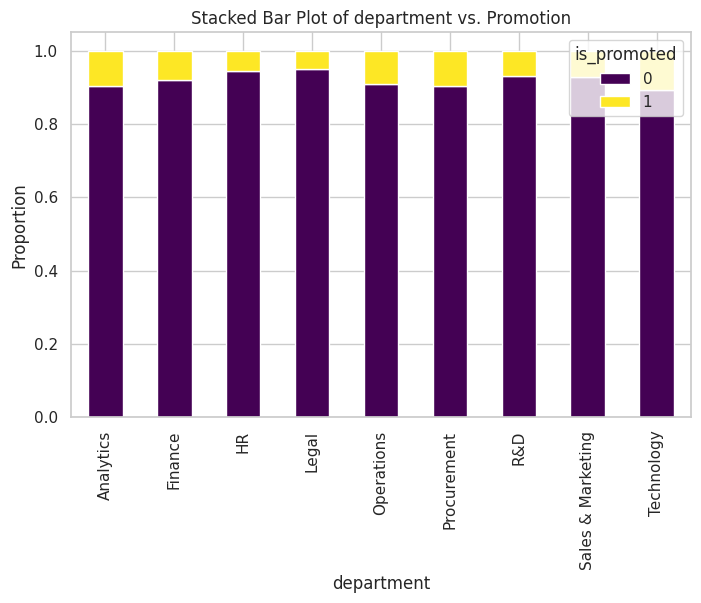

Crosstab for department vs. is_promoted:
is_promoted            0     1
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768 



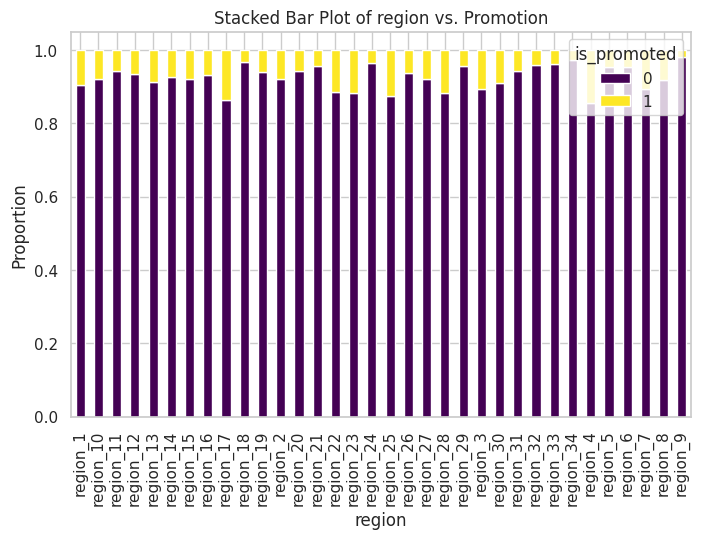

Crosstab for region vs. is_promoted:
is_promoted      0    1
region                 
region_1       552   58
region_10      597   51
region_11     1241   74
region_12      467   33
region_13     2418  230
region_14      765   62
region_15     2586  222
region_16     1363  102
region_17      687  109
region_18       30    1
region_19      821   53
region_2     11354  989
region_20      801   49
region_21      393   18
region_22     5694  734
region_23     1038  137
region_24      490   18
region_25      716  103
region_26     2117  143
region_27     1528  131
region_28     1164  154
region_29      951   43
region_3       309   37
region_30      598   59
region_31     1825  110
region_32      905   40
region_33      259   10
region_34      284    8
region_4      1457  246
region_5       731   35
region_6       658   32
region_7      4327  516
region_8       602   53
region_9       412    8 



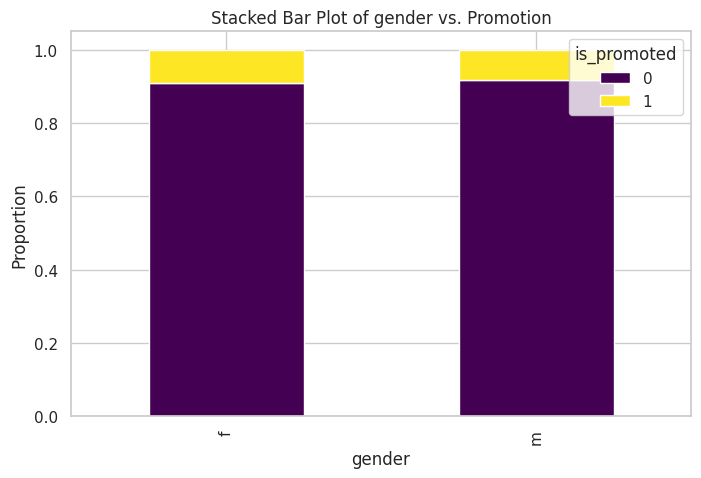

Crosstab for gender vs. is_promoted:
is_promoted      0     1
gender                  
f            14845  1467
m            35295  3201 



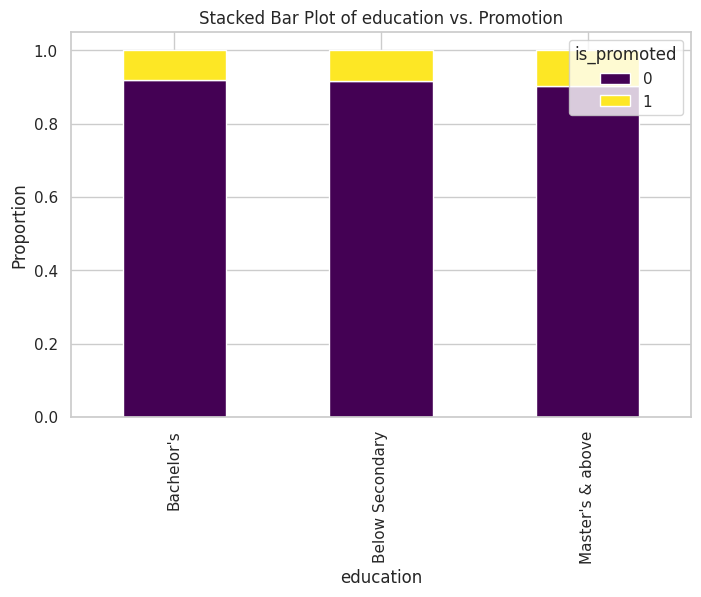

Crosstab for education vs. is_promoted:
is_promoted           0     1
education                    
Bachelor's        33661  3008
Below Secondary     738    67
Master's & above  13454  1471 



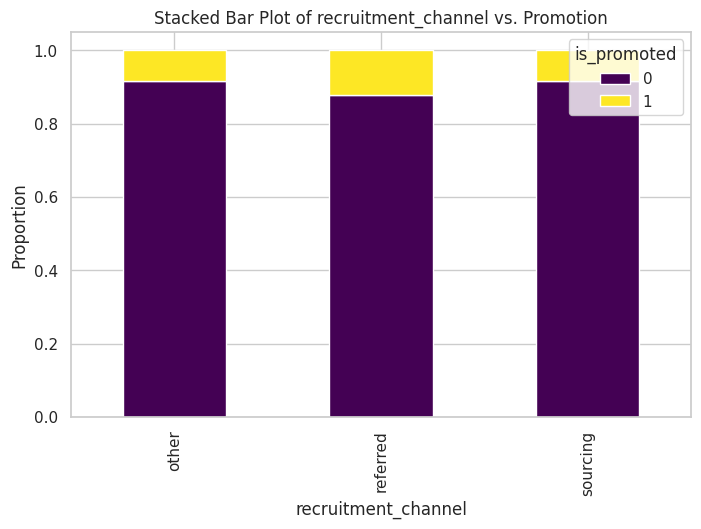

Crosstab for recruitment_channel vs. is_promoted:
is_promoted              0     1
recruitment_channel             
other                27890  2556
referred              1004   138
sourcing             21246  1974 



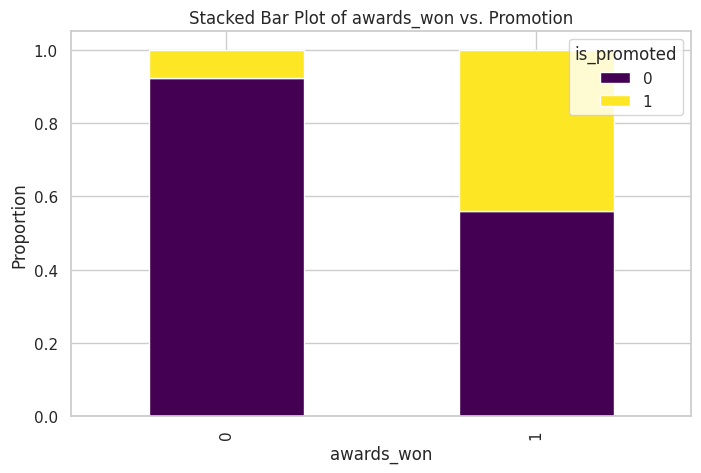

Crosstab for awards_won vs. is_promoted:
is_promoted      0     1
awards_won              
0            49429  4109
1              711   559 



In [11]:
for feature in cat_features:
    # Create a cross-tabulation of feature vs. target
    ct = pd.crosstab(data[feature], data["is_promoted"])
    ct_norm = ct.div(ct.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    ct_norm.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
    plt.title(f'Stacked Bar Plot of {feature} vs. Promotion')
    plt.xlabel(feature)
    plt.ylabel("Proportion")
    plt.legend(title="is_promoted", loc="upper right")
    plt.show()

    # Also, print the cross-tabulation counts
    print(f"Crosstab for {feature} vs. is_promoted:")
    print(ct, "\n")


***Missing Value Summary***

In [12]:
print("Missing values per column:")
print(data.isnull().sum())

# Calculate the percentage of missing values per column
missing_summary = data.isnull().mean() * 100
print("Percentage of Missing Values per Column:")
print(missing_summary)


Missing values per column:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64
Percentage of Missing Values per Column:
employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64


**Outlier Detection for Numeric Features**

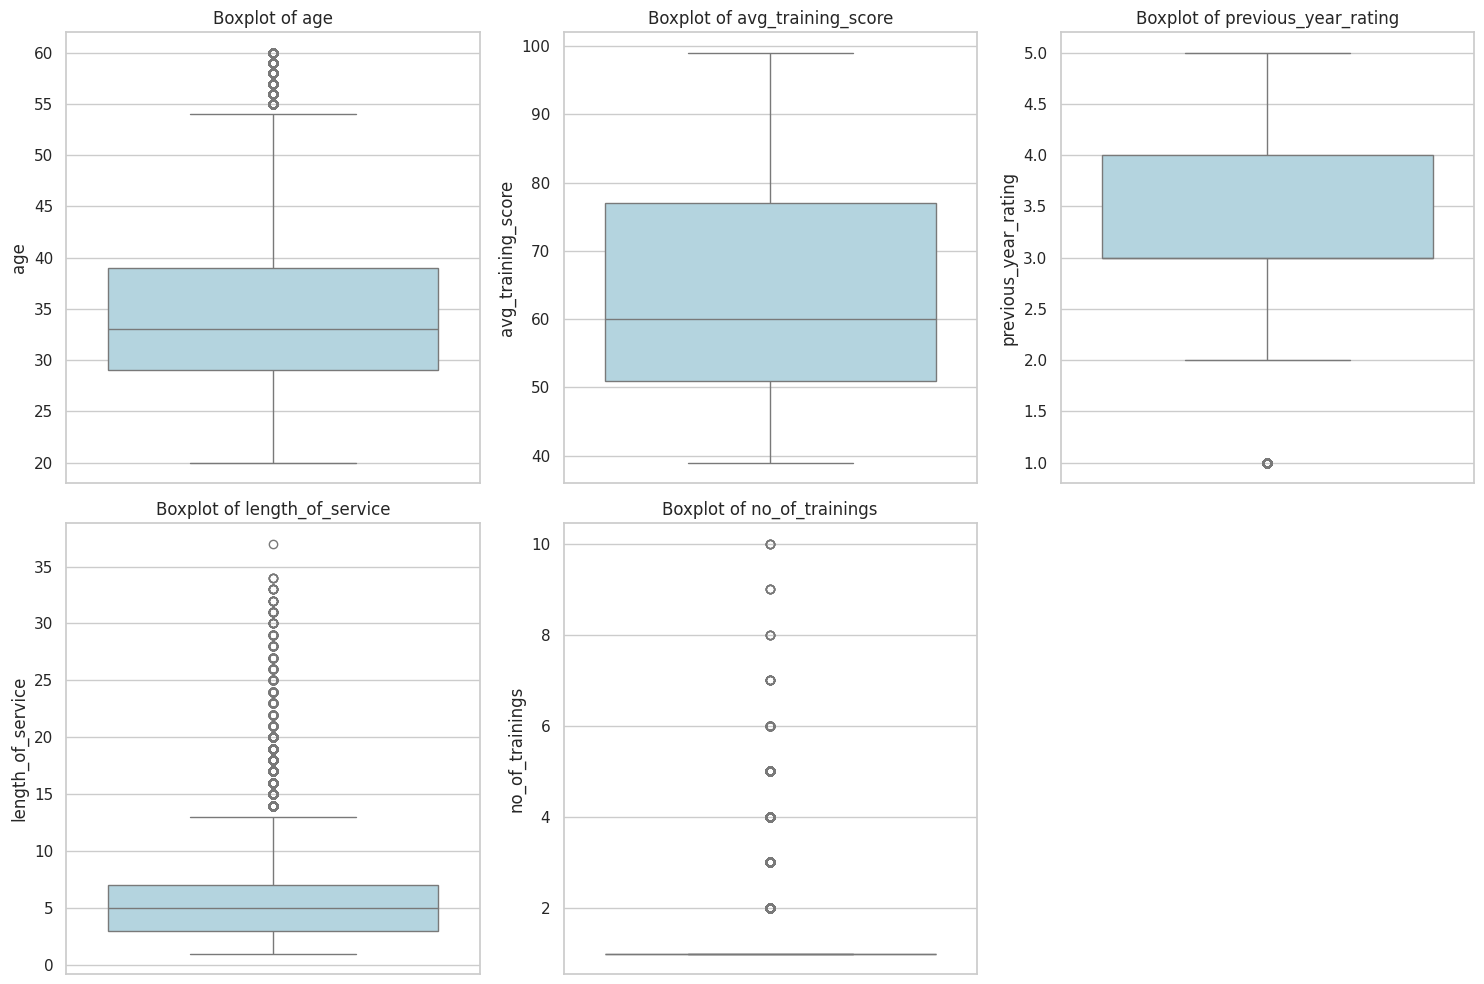

In [13]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[feature], color="lightblue")
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()


**Correlation Analysis**

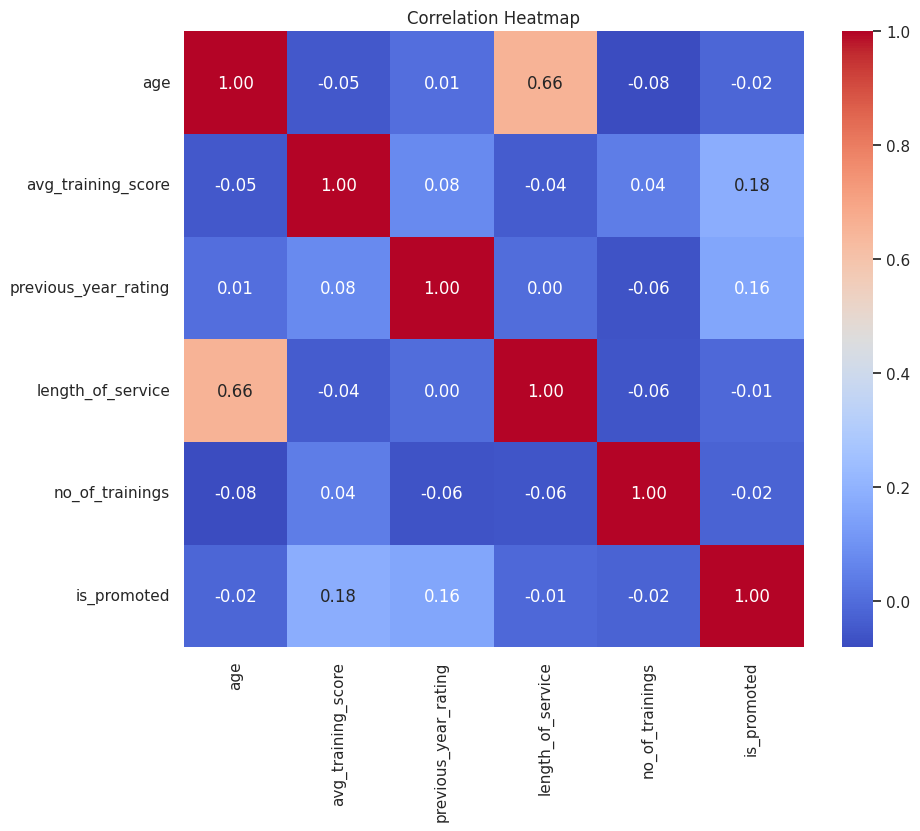

Correlation with is_promoted:
is_promoted             1.000000
avg_training_score      0.184386
previous_year_rating    0.159320
length_of_service      -0.010670
age                    -0.017166
no_of_trainings        -0.024896
Name: is_promoted, dtype: float64


In [14]:
# Include the numerical features and the target variable in the correlation calculation
corr_cols = num_features + ["is_promoted"]
corr_matrix = data[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Print correlations with is_promoted
print("Correlation with is_promoted:")
print(corr_matrix["is_promoted"].sort_values(ascending=False))


**Cramér’s V for Categorical Features**

Cramér's V for department: 0.05
Cramér's V for region: 0.09
Cramér's V for gender: 0.01
Cramér's V for education: 0.03
Cramér's V for recruitment_channel: 0.02
Cramér's V for awards_won: 0.20


<ipython-input-15-aa01566aa0b7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cramers_v_results.keys()), y=list(cramers_v_results.values()), palette="Blues_d")


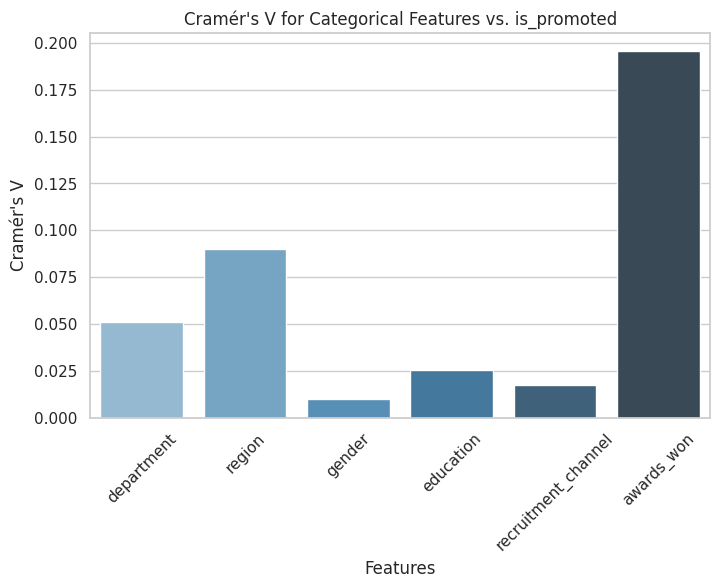

In [15]:
import numpy as np
import scipy.stats as ss

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate and display Cramér's V for each categorical feature vs. is_promoted
cramers_v_results = {}
for feature in cat_features:
    confusion_mat = pd.crosstab(data[feature], data["is_promoted"])
    cv = cramers_v(confusion_mat.values)
    cramers_v_results[feature] = cv
    print(f"Cramér's V for {feature}: {cv:.2f}")

# Visualize the Cramér's V values
plt.figure(figsize=(8, 5))
sns.barplot(x=list(cramers_v_results.keys()), y=list(cramers_v_results.values()), palette="Blues_d")
plt.title("Cramér's V for Categorical Features vs. is_promoted")
plt.xlabel("Features")
plt.ylabel("Cramér's V")
plt.xticks(rotation=45)
plt.show()


**Pre-processing**

**Drop Irrelevant Columns**

In [16]:
# Step 1: Drop irrelevant columns
data.drop(columns=['employee_id'], inplace=True)
print("Data shape after dropping employee_id:", data.shape)


Data shape after dropping employee_id: (54808, 12)


**Handling outliers**

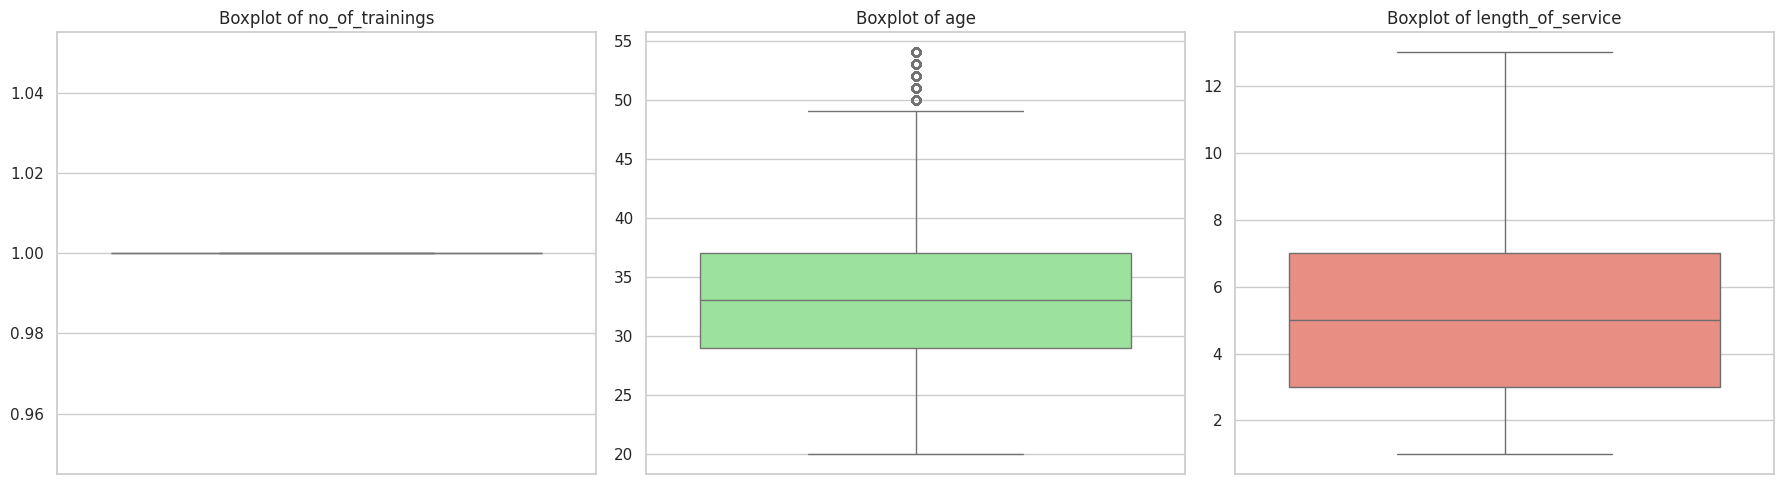

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Apply outlier removal to specific columns
for col in ['age', 'no_of_trainings', 'length_of_service']:
    data = remove_outliers_iqr(data, col)

# Plot all boxplots together
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=data['no_of_trainings'], ax=axes[0], color="lightblue")
axes[0].set_title('Boxplot of no_of_trainings')
axes[0].set_ylabel('')

sns.boxplot(y=data['age'], ax=axes[1], color="lightgreen")
axes[1].set_title('Boxplot of age')
axes[1].set_ylabel('')

sns.boxplot(y=data['length_of_service'], ax=axes[2], color="salmon")
axes[2].set_title('Boxplot of length_of_service')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


**Handling Missing Values**

In [18]:
from sklearn.impute import SimpleImputer

# For numerical columns, we use median imputation
num_cols = ['previous_year_rating', 'avg_training_score']
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# For the categorical column 'education', we use mode (most frequent) imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[['education']] = cat_imputer.fit_transform(data[['education']])


**Encoding Categorical Variables**

In [19]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Copy the dataframe to preserve original data if needed
data_encoded = data.copy()

# Initialize the LabelEncoder and apply it to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Display the first few rows of the encoded data
print("Data with Label Encoded categorical columns:")
print(data_encoded.head())


Data with Label Encoded categorical columns:
   department  region  education  gender  recruitment_channel  \
0           7      31          2       0                    2   
1           4      14          0       1                    0   
2           7      10          0       1                    2   
4           8      18          0       1                    0   
6           4      12          0       0                    0   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won  \
0                1   35                   5.0                  8           0   
1                1   30                   5.0                  4           0   
2                1   34                   3.0                  7           0   
4                1   45                   3.0                  2           0   
6                1   31                   3.0                  5           0   

   avg_training_score  is_promoted  
0                49.0            0  
1        

**Feature Engineering**

In [20]:
import numpy as np
import pandas as pd

# Ensure max_bin is strictly greater than the largest bin edge (20 in this case)
max_bin = max(21, data['length_of_service'].max() + 1)

data['service_category'] = pd.cut(data['length_of_service'],
                                  bins=[0, 5, 10, 20, max_bin],
                                  labels=['Low', 'Medium', 'High', 'Very High'],
                                  right=False)

data['training_efficiency'] = np.where(data['no_of_trainings'] != 0,
                                       data['avg_training_score'] / data['no_of_trainings'],
                                       0)

# Display the new features along with related columns
print("Sample of engineered features:")
print(data[['length_of_service', 'service_category', 'avg_training_score', 'no_of_trainings', 'training_efficiency']].head())

Sample of engineered features:
   length_of_service service_category  avg_training_score  no_of_trainings  \
0                  8           Medium                49.0                1   
1                  4              Low                60.0                1   
2                  7           Medium                50.0                1   
4                  2              Low                73.0                1   
6                  5           Medium                59.0                1   

   training_efficiency  
0                 49.0  
1                 60.0  
2                 50.0  
4                 73.0  
6                 59.0  


**Class Imbalance Check**

In [21]:
print("Target (is_promoted) distribution:")
print(data_encoded['is_promoted'].value_counts())


Target (is_promoted) distribution:
is_promoted
0    37025
1     3665
Name: count, dtype: int64


**Scaling / Normalization**

In [22]:
from sklearn.preprocessing import StandardScaler

# Define numeric_cols (assuming these are your numerical columns)
numeric_cols = ['age', 'avg_training_score', 'length_of_service',
                'no_of_trainings', 'previous_year_rating']

scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

print("Scaled numerical features (first 5 rows):")
print(data_encoded[numeric_cols].head())

Scaled numerical features (first 5 rows):
        age  avg_training_score  length_of_service  no_of_trainings  \
0  0.205145           -1.085418           0.998904              0.0   
1 -0.590188           -0.246134          -0.377320              0.0   
2  0.046078           -1.009119           0.654848              0.0   
4  1.795810            0.745748          -1.065432              0.0   
6 -0.431122           -0.322432          -0.033264              0.0   

   previous_year_rating  
0              1.367067  
1              1.367067  
2             -0.277260  
4             -0.277260  
6             -0.277260  


**Train-Validation-Test Split**

In [23]:
# Separate predictors and target variable
X = data_encoded.drop('is_promoted', axis=1)
y = data_encoded['is_promoted']

# First, split into Train (80%) and Temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Then split Temp evenly into Validation (10%) and Test (10% of original, 50% of Temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (32552, 11)
Validation shape: (4069, 11)
Test shape: (4069, 11)


**Model implementation with original data**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

# Set random seed for reproducibility
RANDOM_STATE = 42


In [36]:
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
        n_estimators=50,
        random_state=RANDOM_STATE
    ),
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "GradientBoost": GradientBoostingClassifier(random_state=RANDOM_STATE),
}

In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("Cross-Validation Accuracy (Training Data):\n")

for model_name, model in models.items():
    cv_scores = cross_val_score(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=kfold,
        scoring='accuracy'  # change to 'f1_macro' if desired
    )
    print(f"{model_name} CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Cross-Validation Accuracy (Training Data):

DecisionTree CV Accuracy: 0.867 ± 0.004
RandomForest CV Accuracy: 0.926 ± 0.002
Bagging CV Accuracy: 0.928 ± 0.001
AdaBoost CV Accuracy: 0.920 ± 0.001
GradientBoost CV Accuracy: 0.929 ± 0.002


In [38]:
print("\nTraining Performance:")
train_acc_summary = {}

for model_name, model in models.items():
    # 5a. Fit on the entire training data
    model.fit(X_train, y_train)

    # 5b. Training set predictions
    train_preds = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)

    train_acc_summary[model_name] = train_acc  # store training accuracy for reference

    # Print result
    print(f"{model_name}: {train_acc:.3f}")

print("\nValidation Performance:")
val_acc_summary = {}

for model_name, model in models.items():
    # 6a. Validation set predictions
    val_preds = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)

    val_acc_summary[model_name] = val_acc  # store validation accuracy for reference

    # Print result
    print(f"{model_name}: {val_acc:.3f}")



Training Performance:
DecisionTree: 0.999
RandomForest: 0.999
Bagging: 0.999
AdaBoost: 0.920
GradientBoost: 0.931

Validation Performance:
DecisionTree: 0.875
RandomForest: 0.932
Bagging: 0.937
AdaBoost: 0.920
GradientBoost: 0.934


In [39]:
print("\n=== Accuracy Summary ===\n")

summary_df = pd.DataFrame({
    "Training Accuracy": train_acc_summary,
    "Validation Accuracy": val_acc_summary
})

# Re-orient so each model is a row
summary_df = summary_df.T
print(summary_df)



=== Accuracy Summary ===

                     DecisionTree  RandomForest   Bagging  AdaBoost  \
Training Accuracy        0.999478      0.999447  0.998618  0.919728   
Validation Accuracy      0.875154      0.931679  0.937331  0.920374   

                     GradientBoost  
Training Accuracy         0.930603  
Validation Accuracy       0.933890  


In [48]:
from sklearn.metrics import f1_score
import pandas as pd

# Initialize dictionaries to store F1 scores for training and validation sets
train_f1_summary = {}
val_f1_summary = {}

# Loop over each model, train, and then compute F1 (macro)
print("\nF1 (Macro) Score Summary for each Model:")

for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Compute training F1 (macro)
    train_preds = model.predict(X_train)
    train_f1 = f1_score(y_train, train_preds, average='macro')
    train_f1_summary[model_name] = train_f1

    # Compute validation F1 (macro)
    val_preds = model.predict(X_val)
    val_f1 = f1_score(y_val, val_preds, average='macro')
    val_f1_summary[model_name] = val_f1

    # Print individual F1 scores
    print(f"{model_name}: Training F1 (Macro) = {train_f1:.3f}, Validation F1 (Macro) = {val_f1:.3f}")

# Optional: Create a DataFrame summary table
summary_df = pd.DataFrame({
    "Training F1 (Macro)": train_f1_summary,
    "Validation F1 (Macro)": val_f1_summary
})

print("\nSummary Table:")
print(summary_df)



F1 (Macro) Score Summary for each Model:
DecisionTree: Training F1 (Macro) = 0.998, Validation F1 (Macro) = 0.660
RandomForest: Training F1 (Macro) = 0.998, Validation F1 (Macro) = 0.698
Bagging: Training F1 (Macro) = 0.996, Validation F1 (Macro) = 0.745
AdaBoost: Training F1 (Macro) = 0.603, Validation F1 (Macro) = 0.600
GradientBoost: Training F1 (Macro) = 0.676, Validation F1 (Macro) = 0.698

Summary Table:
               Training F1 (Macro)  Validation F1 (Macro)
DecisionTree              0.998403               0.659946
RandomForest              0.998309               0.698152
Bagging                   0.995756               0.744913
AdaBoost                  0.603045               0.600484
GradientBoost             0.675759               0.698098


In [49]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

RANDOM_STATE = 42

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_model.fit(X_train, y_train)
print("Classification Report for DecisionTree:")
print(classification_report(y_val, dt_model.predict(X_val)))
print("-" * 60)

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)
print("Classification Report for RandomForest:")
print(classification_report(y_val, rf_model.predict(X_val)))
print("-" * 60)

# 3. Bagging Classifier
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=50,
    random_state=RANDOM_STATE
)
bag_model.fit(X_train, y_train)
print("Classification Report for Bagging:")
print(classification_report(y_val, bag_model.predict(X_val)))
print("-" * 60)

# 4. AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=RANDOM_STATE)
ada_model.fit(X_train, y_train)
print("Classification Report for AdaBoost:")
print(classification_report(y_val, ada_model.predict(X_val)))
print("-" * 60)

# 5. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_model.fit(X_train, y_train)
print("Classification Report for GradientBoost:")
print(classification_report(y_val, gb_model.predict(X_val)))
print("-" * 60)


Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3702
           1       0.35      0.44      0.39       367

    accuracy                           0.88      4069
   macro avg       0.65      0.68      0.66      4069
weighted avg       0.89      0.88      0.88      4069

------------------------------------------------------------
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3702
           1       0.86      0.29      0.43       367

    accuracy                           0.93      4069
   macro avg       0.90      0.64      0.70      4069
weighted avg       0.93      0.93      0.92      4069

------------------------------------------------------------
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3702


**Apply SMOTE to the Training Data**

In [40]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Set random state for reproducibility
RANDOM_STATE = 42

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=RANDOM_STATE)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print the new class distribution in oversampled training data
print("After SMOTE Oversampling, target counts:")
print(pd.Series(y_train_over).value_counts())


After SMOTE Oversampling, target counts:
is_promoted
0    29620
1    29620
Name: count, dtype: int64


In [41]:
from imblearn.over_sampling import SMOTE

# Check original label distribution
print(f"Before Oversampling, counts of label 'Yes': {sum(y_train == 1)}")
print(f"Before Oversampling, counts of label 'No':  {sum(y_train == 0)}\n")

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Check new label distribution after oversampling
print(f"After Oversampling, counts of label 'Yes': {sum(y_train_over == 1)}")
print(f"After Oversampling, counts of label 'No':  {sum(y_train_over == 0)}\n")

# Print shapes of oversampled feature matrix and target vector
print(f"After Oversampling, the shape of train_X: {X_train_over.shape}")
print(f"After Oversampling, the shape of train_y: {y_train_over.shape}")


Before Oversampling, counts of label 'Yes': 2932
Before Oversampling, counts of label 'No':  29620

After Oversampling, counts of label 'Yes': 29620
After Oversampling, counts of label 'No':  29620

After Oversampling, the shape of train_X: (59240, 11)
After Oversampling, the shape of train_y: (59240,)


**Define the Five Models (Using Oversampled Data)**

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Define models; note for Bagging we use 'estimator' (not base_estimator) for newer versions of scikit-learn
models_over = {
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
        n_estimators=50,
        random_state=RANDOM_STATE
    ),
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "GradientBoost": GradientBoostingClassifier(random_state=RANDOM_STATE)
}


In [43]:
from sklearn.metrics import classification_report

print("\nClassification Reports on Training Set (Oversampled Data):\n")
for model_name, model in models_over.items():
    # Fit the model on the oversampled training data
    model.fit(X_train_over, y_train_over)

    # Generate predictions on the training set (oversampled)
    y_train_pred = model.predict(X_train_over)

    # Print the classification report for each model
    print(f"Classification Report for {model_name} (Training):")
    print(classification_report(y_train_over, y_train_pred))
    print("-" * 60)


Classification Reports on Training Set (Oversampled Data):

Classification Report for DecisionTree (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29620
           1       1.00      1.00      1.00     29620

    accuracy                           1.00     59240
   macro avg       1.00      1.00      1.00     59240
weighted avg       1.00      1.00      1.00     59240

------------------------------------------------------------
Classification Report for RandomForest (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29620
           1       1.00      1.00      1.00     29620

    accuracy                           1.00     59240
   macro avg       1.00      1.00      1.00     59240
weighted avg       1.00      1.00      1.00     59240

------------------------------------------------------------
Classification Report for Bagging (Training):
              p

**Train Each Model on Oversampled Data and Print Classification Report**

In [44]:
from sklearn.metrics import classification_report, f1_score

# Dictionary to store validation F1 (macro) scores for each model
val_f1_summary_over = {}

print("\nClassification Reports on Validation Set (Oversampled Data):\n")
for model_name, model in models_over.items():
    # Train the model using oversampled training data
    model.fit(X_train_over, y_train_over)

    # Generate predictions on the original validation set
    y_pred = model.predict(X_val)

    # Print the classification report for each model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_val, y_pred))
    print("-" * 60)

    # Compute and record the F1 (macro) score
    f1_macro = f1_score(y_val, y_pred, average='macro')
    val_f1_summary_over[model_name] = f1_macro
    print(f"{model_name} Validation F1 (Macro): {f1_macro:.3f}\n")



Classification Reports on Validation Set (Oversampled Data):

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3702
           1       0.32      0.45      0.38       367

    accuracy                           0.87      4069
   macro avg       0.63      0.68      0.65      4069
weighted avg       0.89      0.87      0.88      4069

------------------------------------------------------------
DecisionTree Validation F1 (Macro): 0.651

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3702
           1       0.64      0.40      0.49       367

    accuracy                           0.93      4069
   macro avg       0.79      0.69      0.73      4069
weighted avg       0.92      0.93      0.92      4069

------------------------------------------------------------
RandomForest Validation F1 (Macro): 0.

In [54]:
print("Training Performance on Oversampling data:")
train_acc_summary = {}
for model_name, model in models_over.items():
    # Fit on oversampled training data
    model.fit(X_train_over, y_train_over)
    y_train_pred = model.predict(X_train_over)
    train_acc = accuracy_score(y_train_over, y_train_pred)
    train_acc_summary[model_name] = train_acc
    print(f"{model_name}: {train_acc}")

print("\nValidation Performance on Oversampling data:")
val_acc_summary = {}
for model_name, model in models_over.items():
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_acc_summary[model_name] = val_acc
    print(f"{model_name}: {val_acc}")

Training Performance on Oversampling data:
DecisionTree: 0.999713031735314
RandomForest: 0.999679270762998
Bagging: 0.999476704929102
AdaBoost: 0.7573598919648886
GradientBoost: 0.9016374071573261

Validation Performance on Oversampling data:
DecisionTree: 0.8663062177439175
RandomForest: 0.9252887687392479
Bagging: 0.9245514868518063
AdaBoost: 0.717621037109855
GradientBoost: 0.8930941263209634


**Undersampling on training data**

In [55]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_STATE = 42

In [56]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Print label distribution before and after undersampling for verification
print("Before Undersampling:")
print(pd.Series(y_train).value_counts())
print("\nAfter Undersampling:")
print(pd.Series(y_train_under).value_counts())

Before Undersampling:
is_promoted
0    29620
1     2932
Name: count, dtype: int64

After Undersampling:
is_promoted
0    2932
1    2932
Name: count, dtype: int64


In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Check original label distribution
print(f"Before Undersampling, counts of label 'Yes': {sum(y_train == 1)}")
print(f"Before Undersampling, counts of label 'No':  {sum(y_train == 0)}\n")

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Check new label distribution after undersampling
print(f"After Undersampling, counts of label 'Yes': {sum(y_train_under == 1)}")
print(f"After Undersampling, counts of label 'No':  {sum(y_train_under == 0)}\n")

# Print shapes of undersampled feature matrix and target vector
print(f"After Undersampling, the shape of train_X: {X_train_under.shape}")
print(f"After Undersampling, the shape of train_y: {y_train_under.shape}")


Before Undersampling, counts of label 'Yes': 2932
Before Undersampling, counts of label 'No':  29620

After Undersampling, counts of label 'Yes': 2932
After Undersampling, counts of label 'No':  2932

After Undersampling, the shape of train_X: (5864, 11)
After Undersampling, the shape of train_y: (5864,)


In [57]:
models_undersampled = {
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
        n_estimators=50,
        random_state=RANDOM_STATE
    ),
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "GradientBoost": GradientBoostingClassifier(random_state=RANDOM_STATE)
}

In [29]:
from sklearn.metrics import classification_report

print("\nClassification Reports on Training Set (Undersampled Data):\n")
for model_name, model in models_undersampled.items():
    # Train the model using undersampled training data
    model.fit(X_train_under, y_train_under)

    # Generate predictions on the training set (undersampled)
    y_train_pred = model.predict(X_train_under)

    # Print the classification report for each model
    print(f"Classification Report for {model_name} (Training):")
    print(classification_report(y_train_under, y_train_pred))
    print("-" * 60)


Classification Reports on Training Set (Undersampled Data):

Classification Report for DecisionTree (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       1.00      1.00      1.00      2932

    accuracy                           1.00      5864
   macro avg       1.00      1.00      1.00      5864
weighted avg       1.00      1.00      1.00      5864

------------------------------------------------------------
Classification Report for RandomForest (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       1.00      1.00      1.00      2932

    accuracy                           1.00      5864
   macro avg       1.00      1.00      1.00      5864
weighted avg       1.00      1.00      1.00      5864

------------------------------------------------------------
Classification Report for Bagging (Training):
              

In [30]:
print("\nClassification Reports on Validation Set (Undersampled Data):\n")
val_f1_summary_under = {}

for model_name, model in models_undersampled.items():
    # Train model on undersampled training data
    model.fit(X_train_under, y_train_under)

    # Generate predictions on the original validation set
    y_pred = model.predict(X_val)

    # Print classification report for each model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_val, y_pred))
    print("-" * 60)

    # Compute and record the F1 (macro) score on the validation set
    f1_macro = f1_score(y_val, y_pred, average='macro')
    val_f1_summary_under[model_name] = f1_macro
    print(f"{model_name} Validation F1 (Macro): {f1_macro:.3f}\n")



Classification Reports on Validation Set (Undersampled Data):

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      3702
           1       0.15      0.69      0.25       367

    accuracy                           0.63      4069
   macro avg       0.55      0.66      0.51      4069
weighted avg       0.88      0.63      0.71      4069

------------------------------------------------------------
DecisionTree Validation F1 (Macro): 0.505

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      3702
           1       0.21      0.71      0.32       367

    accuracy                           0.73      4069
   macro avg       0.58      0.72      0.58      4069
weighted avg       0.89      0.73      0.78      4069

------------------------------------------------------------
RandomForest Validation F1 (Macro): 0

In [59]:
print("Training Performance (Undersampled Data):")
train_acc_summary_under = {}
for model_name, model in models_undersampled.items():
    y_train_pred = model.predict(X_train_under)
    train_acc = accuracy_score(y_train_under, y_train_pred)
    train_acc_summary_under[model_name] = train_acc
    print(f"{model_name}: {train_acc}")

print("\nValidation Performance (Undersampled Data):")
val_acc_summary_under = {}
for model_name, model in models_undersampled.items():
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_acc_summary_under[model_name] = val_acc
    print(f"{model_name}: {val_acc}")

Training Performance (Undersampled Data):
DecisionTree: 0.9991473396998636
RandomForest: 0.9991473396998636
Bagging: 0.998806275579809
AdaBoost: 0.657912687585266
GradientBoost: 0.7407912687585266

Validation Performance (Undersampled Data):
DecisionTree: 0.6338166625706562
RandomForest: 0.7291717866797739
Bagging: 0.7168837552224133
AdaBoost: 0.6920619316785451
GradientBoost: 0.8009338903907594


**Fine-Tunning on best Models**

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 42

In [61]:
param_grid_rf = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [62]:
param_grid_gbm = {
    "n_estimators": [100, 150, 200, 250],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": ['auto', 'sqrt', 'log2']
}
# Bagging parameter grid
param_grid_bagging = {
    "n_estimators": [10, 50, 100, 150],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False]
}

In [63]:
# (a) RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=50,
    scoring='f1_macro',  # Using F1 (macro) due to class imbalance
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)
print("RandomForest Best Parameters:")
print(rf_random.best_params_)
print("Best CV F1 (Macro) Score:", rf_random.best_score_)

# (b) AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)

# Define the parameter grid for AdaBoostClassifier
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_random = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_grid_ada,  # Use the defined param_grid_ada
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
ada_random.fit(X_train, y_train)
print("\nAdaBoost Best Parameters:")
print(ada_random.best_params_)
print("Best CV F1 (Macro) Score:", ada_random.best_score_)

# (c) GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=RANDOM_STATE)
gbm_random = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_grid_gbm,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
gbm_random.fit(X_train, y_train)
print("\nGradientBoosting Best Parameters:")
print(gbm_random.best_params_)
print("Best CV F1 (Macro) Score:", gbm_random.best_score_)

# (d) BaggingClassifier
# For Bagging, we use a DecisionTreeClassifier as the base estimator.
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                            random_state=RANDOM_STATE)
bagging_random = RandomizedSearchCV(
    estimator=bagging,
    param_distributions=param_grid_bagging,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
bagging_random.fit(X_train, y_train)
print("\nBagging Best Parameters:")
print(bagging_random.best_params_)
print("Best CV F1 (Macro) Score:", bagging_random.best_score_)

RandomForest Best Parameters:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best CV F1 (Macro) Score: 0.6780195515212041


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



AdaBoost Best Parameters:
{'n_estimators': 200, 'learning_rate': 1.0}
Best CV F1 (Macro) Score: 0.6058873961021091


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/


GradientBoosting Best Parameters:
{'subsample': 1.0, 'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.2}
Best CV F1 (Macro) Score: 0.7128721044764484

Bagging Best Parameters:
{'n_estimators': 150, 'max_samples': 0.7, 'max_features': 1.0, 'bootstrap': True}
Best CV F1 (Macro) Score: 0.7053475559244925


In [64]:
from sklearn.metrics import classification_report

# Evaluate the tuned RandomForest model
rf_best = rf_random.best_estimator_
rf_train_preds = rf_best.predict(X_train)
rf_val_preds = rf_best.predict(X_val)

print("RandomForest - Training Classification Report:")
print(classification_report(y_train, rf_train_preds))
print("RandomForest - Validation Classification Report:")
print(classification_report(y_val, rf_val_preds))
print("=" * 70)

# Evaluate the tuned AdaBoost model
ada_best = ada_random.best_estimator_
ada_train_preds = ada_best.predict(X_train)
ada_val_preds = ada_best.predict(X_val)

print("AdaBoost - Training Classification Report:")
print(classification_report(y_train, ada_train_preds))
print("AdaBoost - Validation Classification Report:")
print(classification_report(y_val, ada_val_preds))
print("=" * 70)

# Evaluate the tuned GradientBoosting model
gbm_best = gbm_random.best_estimator_
gbm_train_preds = gbm_best.predict(X_train)
gbm_val_preds = gbm_best.predict(X_val)

print("GradientBoosting - Training Classification Report:")
print(classification_report(y_train, gbm_train_preds))
print("GradientBoosting - Validation Classification Report:")
print(classification_report(y_val, gbm_val_preds))
print("=" * 70)

# Evaluate the tuned Bagging model
bagging_best = bagging_random.best_estimator_
bagging_train_preds = bagging_best.predict(X_train)
bagging_val_preds = bagging_best.predict(X_val)

print("Bagging - Training Classification Report:")
print(classification_report(y_train, bagging_train_preds))
print("Bagging - Validation Classification Report:")
print(classification_report(y_val, bagging_val_preds))
print("=" * 70)


RandomForest - Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29620
           1       1.00      0.91      0.95      2932

    accuracy                           0.99     32552
   macro avg       1.00      0.96      0.98     32552
weighted avg       0.99      0.99      0.99     32552

RandomForest - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3702
           1       0.84      0.34      0.48       367

    accuracy                           0.93      4069
   macro avg       0.89      0.67      0.72      4069
weighted avg       0.93      0.93      0.92      4069

AdaBoost - Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     29620
           1       0.79      0.16      0.26      2932

    accuracy                           0.92

RandomForest CV Accuracy Scores: [0.92673936 0.92950392 0.92565284 0.92780338 0.92580645]
AdaBoost CV Accuracy Scores: [0.91875288 0.9218246  0.91889401 0.92119816 0.92119816]
GradientBoosting CV Accuracy Scores: [0.9319613  0.9341115  0.93471582 0.93502304 0.93087558]
Bagging CV Accuracy Scores: [0.92935033 0.93349716 0.92949309 0.93241167 0.93026114]


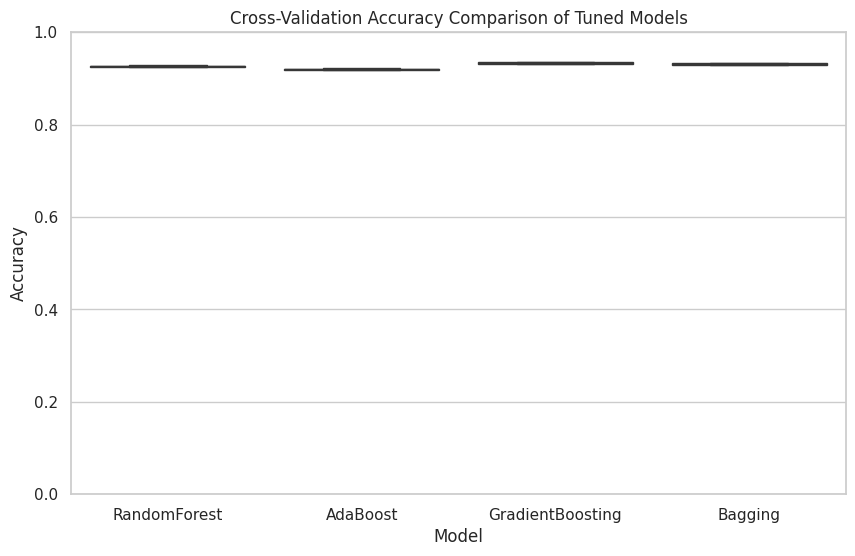

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define a dictionary with your tuned models
# (Ensure these models are already defined from the tuning process)
tuned_models = {
    "RandomForest": rf_best,
    "AdaBoost": ada_best,
    "GradientBoosting": gbm_best,
    "Bagging": bagging_best
}

# Compute cross-validation accuracy scores for each tuned model (using 5-fold CV)
cv_scores_dict = {}
for name, model in tuned_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_dict[name] = scores
    print(f"{name} CV Accuracy Scores: {scores}")

# Convert the cross-validation scores dictionary into a DataFrame for plotting
cv_scores_df = pd.DataFrame(cv_scores_dict)

# Plot a boxplot to compare the cross-validation accuracy distributions of the tuned models
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df, palette="viridis")
plt.title("Cross-Validation Accuracy Comparison of Tuned Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Full training data shape: (36621, 11)
Full training target distribution:
 is_promoted
0    33322
1     3299
Name: count, dtype: int64

Confusion Matrix:
[[3686   17]
 [ 237  129]]

F1 Score (Macro): 0.7352995713676895

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3703
           1       0.88      0.35      0.50       366

    accuracy                           0.94      4069
   macro avg       0.91      0.67      0.74      4069
weighted avg       0.93      0.94      0.93      4069


Feature Importances:
                 Feature  Importance
10    avg_training_score    0.462189
0             department    0.160347
9             awards_won    0.109025
7   previous_year_rating    0.096123
1                 region    0.053385
6                    age    0.047709
8      length_of_service    0.034096
3                 gender    0.016541
2              education    0.010431
4    recruitment_channel    0.010154
5 

<ipython-input-70-2b85c6beb99d>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')


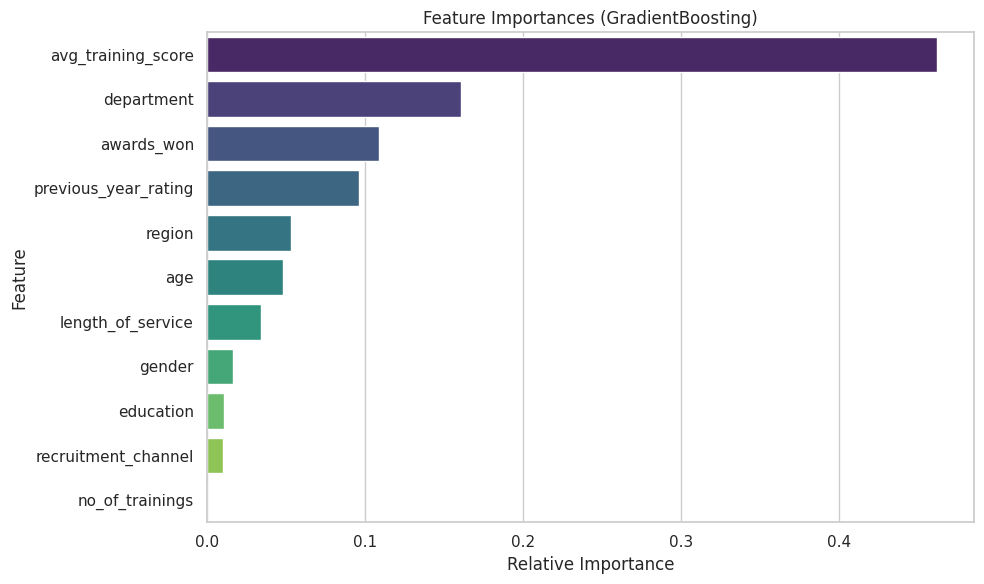

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Step 1: Combine Training and Validation Sets
X_full_train = pd.concat([X_train, X_val], axis=0)
y_full_train = pd.concat([y_train, y_val], axis=0)
print("Full training data shape:", X_full_train.shape)
print("Full training target distribution:\n", y_full_train.value_counts())



best_model = gbm_best
best_model.fit(X_full_train, y_full_train)

# Step 3: Evaluate on the Test Set
y_test_preds = best_model.predict(X_test)

# Compute and print the Confusion Matrix
cm = confusion_matrix(y_test, y_test_preds)
print("\nConfusion Matrix:")
print(cm)

# Compute and print the F1 Score (Macro)
f1_macro = f1_score(y_test, y_test_preds, average='macro')
print("\nF1 Score (Macro):", f1_macro)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_preds))

# Step 4: Feature Importance (if supported)
if hasattr(best_model, "feature_importances_"):
    feature_names = X_full_train.columns
    importances = best_model.feature_importances_

    # Create a DataFrame for feature importance and sort it
    feat_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feat_importances)

    # Plot Feature Importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
    plt.title('Feature Importances (GradientBoosting)')
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\nThe selected model does not support feature importance.")


<ipython-input-67-822716f6d0a2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top10, palette="viridis")


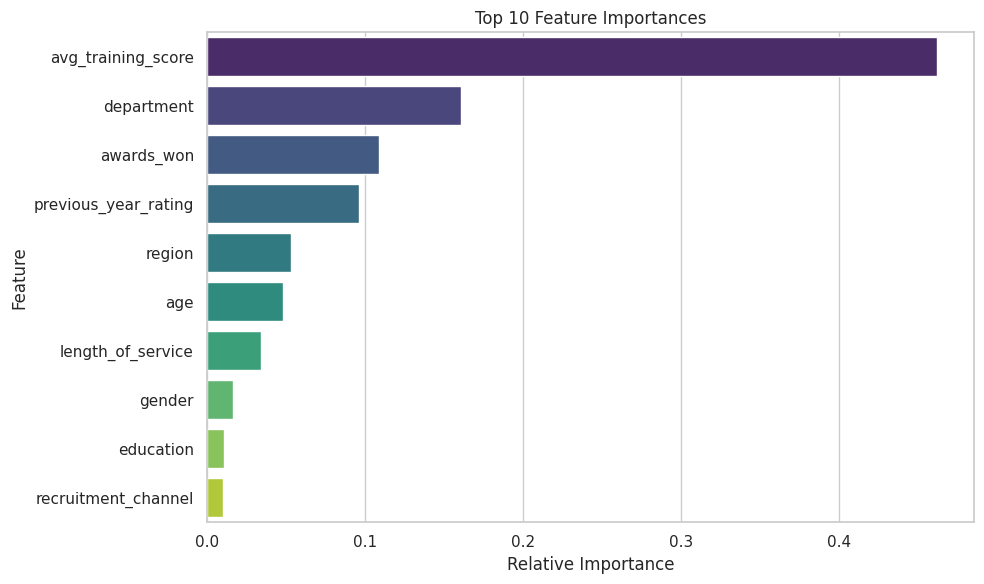

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if the best model supports feature importances
if hasattr(best_model, "feature_importances_"):
    # Extract feature names and corresponding importances
    feature_names = X_full_train.columns
    importances = best_model.feature_importances_

    # Create a DataFrame from feature importances and sort it in descending order
    feat_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Select top 10 features
    top10 = feat_importance_df.head(10)

    # Visualize the top 10 feature importances with a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=top10, palette="viridis")
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Relative Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("The selected model does not support feature importances.")
